# Import Data

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn import metrics
import matplotlib.pyplot as plt
import sys
from sqlalchemy import create_engine
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

import numpy as np 


account = pd.read_csv("data/account.csv", sep=";")
card = pd.read_csv("data/card_dev.csv", sep=";")
client = pd.read_csv("data/client.csv", sep=";")
disposition = pd.read_csv("data/disp.csv", sep=";")
demograph = pd.read_csv("data/district.csv",sep=";")
loan = pd.read_csv("data/loan_dev.csv", sep=";")
transactions = pd.read_csv("data/trans_dev.csv",sep=";", low_memory=False)
merged_data = pd.read_csv("refined/final_data.csv", sep=";")

print(merged_data.shape)

(24494, 41)


# Split Data

In [2]:
def split_data(X, y, test_size):
    return train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

# Sampling

In [3]:
def smote_sampling(X_train, y_train):
    sm = SMOTE(random_state=42)
    return sm.fit_resample(X_train, y_train)

# Fit and Predict

In [4]:
def fit_and_predict(model, X_train, y_train, X_test):
    model = model.fit(X_train, y_train)
    prediction = model.predict(X_test)

    return prediction

# Calculate Statistics

In [5]:
def calculate_statistics(y_test, pred):
    accuracy = metrics.accuracy_score(y_test, pred)
    precision = metrics.precision_score(y_test, pred)
    recall = metrics.recall_score(y_test, pred)
    f1_score1 = metrics.f1_score(y_test, pred)
    
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1_score1}")

# Confusion Matrix

In [6]:
def display_conf_matrix_graph(y_test, pred):
    conf_matrix = confusion_matrix(y_test, pred)
    
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["Not Paid", "Paid"])
    cm_display.plot()

# Aplication of a models

## Decision Tree

### Features : amount, duration and payments


Accuracy: 0.7070707070707071
Precision: 0.9027777777777778
Recall: 0.7471264367816092
F1-Score: 0.8176100628930817


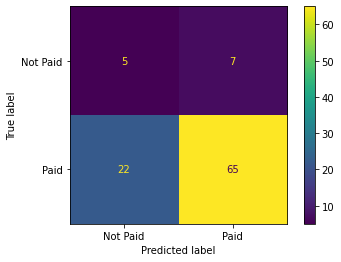

In [7]:

features = ['amount', 'duration', 'payments']
X = loan[features]
y = loan["status"]

X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

dTree = DecisionTreeClassifier()
prediction = fit_and_predict(dTree, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

### Features : merged data collumns names without string collumns that are not numerical

#### Merged Data

In [8]:
merged_data.drop(columns=merged_data.columns[0], axis=1, inplace=True)
# exclude non-numeric columns
merged_data = merged_data.select_dtypes(exclude=['object'])
get_collumns_names = list(merged_data)
# drop loan_status 
for index in range(len(get_collumns_names)):
    if(get_collumns_names[index] == 'loan_status'):
        del get_collumns_names[index]
        break
print(get_collumns_names)
merged_data
save_loan_status = merged_data['loan_status']

['loan_id', 'account_id', 'loan_amount', 'loan_duration', 'loan_payments', 'loan_year', 'disp_id', 'client_id', 'client_district_id', 'birth_year', 'client_age', 'client_gender', 'district_id_x', 'account_frequency', 'account_year', 'district_id_y', 'region', 'no. of municipalities with inhabitants < 499 ', 'no. of municipalities with inhabitants 500-1999', 'no. of municipalities with inhabitants 2000-9999 ', 'no. of municipalities with inhabitants >10000 ', 'no. of cities ', 'ratio of urban inhabitants ', 'average salary ', 'criminal growth', 'unemploymant growth', 'enterpreuners ratio', 'trans_id', 'trans_amount', 'trans_balance', 'trans_year', 'age on loan', 'account age at loan']


Features:  ['loan_id', 'account_id', 'loan_amount', 'loan_duration', 'loan_payments', 'loan_year', 'disp_id', 'client_id', 'client_district_id', 'birth_year', 'client_age', 'client_gender', 'district_id_x', 'account_frequency', 'account_year', 'district_id_y', 'region', 'no. of municipalities with inhabitants < 499 ', 'no. of municipalities with inhabitants 500-1999', 'no. of municipalities with inhabitants 2000-9999 ', 'no. of municipalities with inhabitants >10000 ', 'no. of cities ', 'ratio of urban inhabitants ', 'average salary ', 'criminal growth', 'unemploymant growth', 'enterpreuners ratio', 'trans_id', 'trans_amount', 'trans_balance', 'trans_year', 'age on loan', 'account age at loan']
Accuracy: 0.7588787590148319
Precision: 0.9222065063649222
Recall: 0.7965791081246182
F1-Score: 0.8548017043592264


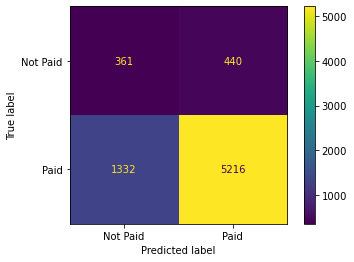

In [9]:

y = merged_data["loan_status"]
# drop loan_status from features ( obviously )
merged_data.drop(columns=["loan_status"], axis=1, inplace=True)

features = get_collumns_names
print("Features: ", features)
X = merged_data[features]

X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

dTree = DecisionTreeClassifier()
prediction = fit_and_predict(dTree, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

We need to separate date birth day in 3 columns: day, month and year. 
We need to transform the categorical data in numerical data ( all ?!?)
Do this on data preparation and use refined data on data understanding.
The merged data, need to be sorted by date of loan ascending order. ( See this )

## Logistic Regression

### Features : amount, duration and payments

Accuracy: 0.494949494949495
Precision: 0.8627450980392157
Recall: 0.5057471264367817
F1-Score: 0.6376811594202899


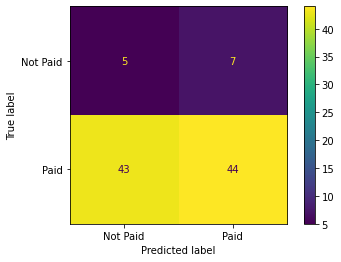

In [10]:
features = ['amount', 'duration', 'payments']
X = loan[features]
y = loan["status"]

X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

logistic_regression = LogisticRegression()
prediction = fit_and_predict(logistic_regression, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

### Features : merged data collumns names without string collumns that are not numerical

Features:  ['loan_id', 'account_id', 'loan_amount', 'loan_duration', 'loan_payments', 'loan_year', 'disp_id', 'client_id', 'client_district_id', 'birth_year', 'client_age', 'client_gender', 'district_id_x', 'account_frequency', 'account_year', 'district_id_y', 'region', 'no. of municipalities with inhabitants < 499 ', 'no. of municipalities with inhabitants 500-1999', 'no. of municipalities with inhabitants 2000-9999 ', 'no. of municipalities with inhabitants >10000 ', 'no. of cities ', 'ratio of urban inhabitants ', 'average salary ', 'criminal growth', 'unemploymant growth', 'enterpreuners ratio', 'trans_id', 'trans_amount', 'trans_balance', 'trans_year', 'age on loan', 'account age at loan']
Accuracy: 0.7541162062865696
Precision: 0.9190383595545342
Recall: 0.7939828955406231
F1-Score: 0.8519459238017205


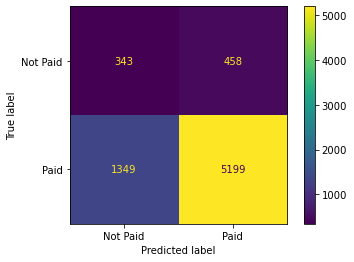

In [11]:

y = save_loan_status
features = get_collumns_names
print("Features: ", features)
X = merged_data[features]

X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

dTree = DecisionTreeClassifier()
prediction = fit_and_predict(dTree, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

## Support Vector Machine - Linear

### Features : amount, duration and payments

Accuracy: 0.41414141414141414
Precision: 0.8717948717948718
Recall: 0.39080459770114945
F1-Score: 0.5396825396825398


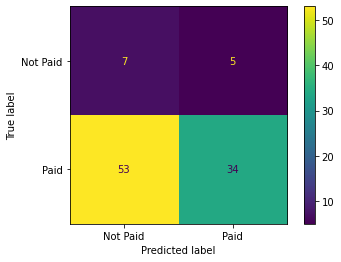

In [14]:
from sklearn import svm
features = ['amount', 'duration', 'payments']
X = loan[features]
y = loan["status"]
X= X.to_numpy()
y = y.to_numpy()

X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

# Default values for C and gamma
svm_linear = svm.SVC(kernel='linear')
prediction = fit_and_predict(svm_linear, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

A good idea is to tunne C, Gamma and Kernel parameters ( and others) depending on the data and the chosen SVM model.

### Features : merged data collumns names without string collumns that are not numerical

In [ ]:
y = save_loan_status
features = get_collumns_names
print("Features: ", features)
X = merged_data[features]
X= X.to_numpy()
y = y.to_numpy()
X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

# Default values for SVM linear parameters
svm_linear = svm.SVC(kernel="linear")
prediction = fit_and_predict(svm_linear, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

## Support Vector Machine - Non Linear

### Features : amount, duration and payments

In [ ]:
features = ['amount', 'duration', 'payments']
X = loan[features]
y = loan["status"]
# Use numpy matrix to improve performance
X= X.to_numpy()
y = y.to_numpy()

X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

# Default values for SVM non-linear parameters
svm_non_linear = svm.SVC(kernel="rbf")
prediction = fit_and_predict(svm_non_linear, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

What is happening with the data? Why the model is not working?

### Features : merged data collumns names without string collumns that are not numerical

In [ ]:
y = save_loan_status
features = get_collumns_names
print("Features: ", features)
X = merged_data[features]
X= X.to_numpy()
y = y.to_numpy()
X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

# Default values for SVM non-linear parameters
svm_non_linear = svm.SVC(kernel="rbf")
prediction = fit_and_predict(svm_non_linear, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

We need parameters tuning and better feature selection, data preparation and or data understanding.
Check on all models what is the positive and negative class and the confusion matrix not random ! Data sorted by date of loan ascending order. ( See this )
Experimentar várias estratégias de sampling, como por exemplo, undersampling, oversampling, SMOTE, etc.
Validatin after test, not before. ( See this ) ?!!?
Featuring enginnering, feature selection !!!! ( See this )
Descriptive modeling : clustering, PCA, etc. ( See this )
No fundo: passar por todos os passos das teóricas de data mining, e ver o que se pode fazer para melhorar os resultados. ( See this )
Tests with different models, and different parameters. ( See this )
Tests need to be about loans in the future comparing with the data training !!!!
New feature: loan amount / duration
New feature: loan amount / payments
New feature: loan amount / payments / duration
New feature: number of clients with the same account with loan
New feature: try to calculate "taxa de esforço" ou algo parecido
New feature : get month balance, calculate the average and compare with the loan month payment -> sum the value of the loan payment
Maybe delete the type of transaction !!!
-> See the formulas used by banks !!!
See account_frequency: meaning and maybe changing to numerical values